# CABIN: Cuts as Biases in Networks


## Importing Data
### data_concat
**data_concat(path, files, tree, features)**

Uses a concatenation loop to return an awkward array of data 
#### Parameters:
* **path:**

  The data path that your files are apart of.
* **files:** *list*

  Files located in your path that you want to use.
* **tree:** 

  Name of treename.
* **features:** *list*

  What features you want to use.
#### Returns:
* **data:** *awkward array*

  Shape : \
  [ 'feat0': [0,1,2,3,...], \
  [ 'feat1': [0,1,2,3,...], \
  [ 'feat2': [0,1,2,3,...], \
  ... \
  [ 'featN': [0,1,2,3,...]]

In [1]:
from LearningCutsUtils.Utils import *

filespath="/data/mhance/photons/NTUP_ZLLG/"
filename = [
'mc16e_13TeV/00-03-01/mc16e.PowhegPythia8EvtGen_AZNLOCTEQ6L1_Zee.DAOD_EGAM3.e3601_e5984_s3126_r10724_r10726_p3954.root',
'mc16e_13TeV/00-03-01/mc16e.PowhegPythia8EvtGen_AZNLOCTEQ6L1_Zmumu.DAOD_EGAM4.e3601_e5984_s3126_r10724_r10726_p3954.root',
'mc16e_13TeV/00-03-01/mc16e.Sh_224_NN30NNLO_eegamma_LO_pty_140_E_CMS.DAOD_EGAM3.e7006_e5984_s3126_r10724_r10726_p3956.root',
'mc16e_13TeV/00-03-01/mc16e.Sh_224_NN30NNLO_eegamma_LO_pty_15_35.DAOD_EGAM3.e7006_e5984_s3126_r10724_r10726_p3956.root',
'mc16e_13TeV/00-03-01/mc16e.Sh_224_NN30NNLO_eegamma_LO_pty_35_70.DAOD_EGAM3.e7006_e5984_s3126_r10724_r10726_p3956.root',
'mc16e_13TeV/00-03-01/mc16e.Sh_224_NN30NNLO_eegamma_LO_pty_70_140.DAOD_EGAM3.e7006_e5984_s3126_r10724_r10726_p3956.root',
'mc16e_13TeV/00-03-01/mc16e.Sh_224_NN30NNLO_eegamma_LO_pty_7_15.DAOD_EGAM3.e7006_e5984_s3126_r10724_r10726_p3956.root',
'mc16e_13TeV/00-03-01/mc16e.Sh_224_NN30NNLO_mumugamma_LO_pty_7_15.DAOD_EGAM4.e7006_e5984_s3126_r10724_r10726_p3956.root',
'mc16e_13TeV/00-03-01/mc16e.Sh_224_NN30NNLO_mumugamma_LO_pty_140_E_CMS.DAOD_EGAM4.e7006_e5984_s3126_r10724_r10726_p3956.root',
'mc16e_13TeV/00-03-01/mc16e.Sh_224_NN30NNLO_mumugamma_LO_pty_15_35.DAOD_EGAM4.e7006_e5984_s3126_r10724_r10726_p3956.root',
'mc16e_13TeV/00-03-01/mc16e.Sh_224_NN30NNLO_mumugamma_LO_pty_35_70.DAOD_EGAM4.e7006_e5984_s3126_r10724_r10726_p3956.root',
'mc16e_13TeV/00-03-01/mc16e.Sh_224_NN30NNLO_mumugamma_LO_pty_70_140.DAOD_EGAM4.e7006_e5984_s3126_r10724_r10726_p3956.root'
]
treename = "output"
expressions_for_batch = ['ph.pt','ph.eta','ph.rhad','ph.rhad1','ph.reta','ph.rphi','ph.weta2','ph.eratio','ph.deltae','ph.wstot','ph.fside','ph.w1','ph.truth_pdgId','ph.truth_type','ph.convFlag']

data = data_concat(filespath,filename,treename,expressions_for_batch)

### data_mask
**data_mask(data, energy_range, eta_range)**

Masks data to the energy and eta range that is inputted.
#### Parameters:
* **data:** *awkward array*

  Data in the form of an awkward array that has arrays indexed "ph.pt" and "ph.eta". 

* **energy_range:** *= (min_energy, max_energy)* 

  Lower and upper bounds on energy. Defaults to no bounds.
* **eta_range:** *= (min_eta, max_eta)* 

  Lower and upper bounds on psuedorapidity. Defaults to no bounds.
#### Returns:
* **masked_data:** *numpy array*

  Shape : features $\times$ event candidates.

This mask includes 969759 event candidates:


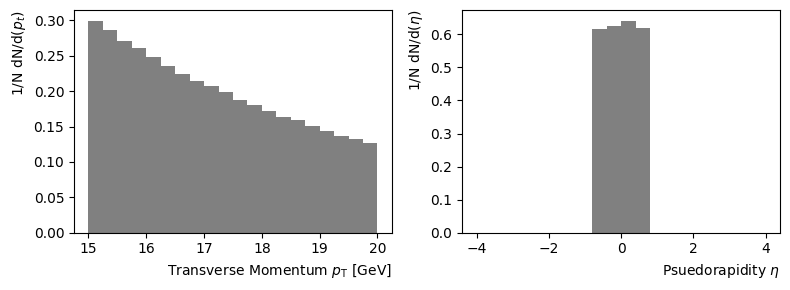

In [2]:
erange = (15000,20000)
absetarange = (0.,0.8)
masked_data = data_mask(data,erange,absetarange)

### Discriminating Variables:
There are three broad categories of discriminating variables for photon identi cation that are based
 on calorimeter information. The first category considers the amount of energy deposited in different
 layers of the EM and hadronic calorimeters relative to the total cluster energy; the second looks at
 the profile of the EM shower in the primary (second) sampling layer of the EM calorimeter; and
 the final looks at the shower profile in the strip layer. 
#### Energy Ratios:
* $R_{had}$: the ratio of total transverse energy in the hadronic calorimeter (in a $\Delta \eta \times \Delta \phi$ region of $0.24 \times 0.24$ behind the photon cluster) to the transverse energy of the photon cluster.
* $R_{had_{1}}$: the ratio of total transverse energy in the first sampling layer of the hadronic calorimeter (in a $\Delta \eta \times \Delta \phi$ region of $0.24 \times 0.24$ behind the photon cluster) to the transverse energy of the photon cluster.
$R_{had}$ is only considered for $ 0.8 \leq |\eta| < 1.37$ (where the hadronic calorimeter
 transitions from the barrel to the extended barrel). $R_{had_{1}}$ is considered for all other $\eta$.
#### Layer-2 Variables:
* $w_2$: Lateral width of the shower in $\eta$ over a region of $3\times 5$ cells in $\Delta \eta \times \Delta \phi$  around the center of the photon cluster. It is defined as:
$$ w_{2} = \sqrt{   \frac{\sum E_i \eta_i^2}{E_i} - \left[\frac{\sum E_i \eta_i}{E_i}\right]^2}$$
where $i$ indicates the cell index, ranging from 0 to 14. 

* $R_{\eta}$ The spread in $\eta$ of the energy outside the cluster. Defined as:
$$ R_{\eta} = \frac{E_{3 \times 7}^{S2}}{E_{7 \times 7}^{S2}}$$
where $E_{x \times y}^{S2}$ is the energy contained in $x \times y$ cells ($\eta \times \phi$) of the second layer, centerd on the cluster used to define the photon.


* $R_{\phi}$ The spread in $\phi$ of the energy within (and outside of) the cluster. Defined as:
$$ R_{\phi} = \frac{E_{3 \times 3}^{S2}}{E_{7 \times 7}^{S2}}$$
where $E_{x \times y}^{S2}$ is defined as it is for $R_{\eta}$.

#### Strip Variables:
* $F_{side}$: The spread in the lateral spread in $\eta$ of the shower. It is defined as:
$$ F_{side} = \frac{E_{7 \times 1}^{S1} - E_{3 \times 1}^{S1}}{E_{7 \times 1}^{S1}}$$
where $E_{x \times y}^{S1}$ are the $x \times y$ ($\eta \times \phi$) strips surrounding the strip with the largest energy.

* $w_{s,3}$: The weighted shower width in $\eta$ in the three strips. It is defined as:
$$ w_{s,3} = \sqrt{\frac{\sum E_{i}(i-i_{max})^2}{\sum E_{i}}}$$
where $i$ corresponds to the strip number, and $i_{max}$ is index of the strip with the largest energy.

* $w_{s,tot}$: Identical to $w_{s,3}$, except it is measured over all strips in a region of $\Delta \eta \times \Delta \phi = 0.0625 \times .2$ (20 $\times$ 2 strips).

* $\Delta E$: Attempts to quantify the degree to whcih there are two peaks present in the energy profile. It is defined as:
$$ \Delta E = \left[E_{max2}^{S1} - E_{min}^{S1}\right]$$
where $E_{max2}^{S1}$ is the energy of the strip that has the second greatest energy, and $E_{min}^{S1}$ is the energy of the strip with the least energy found between the strips with the greatest and second greatest energies. For candidates without a distinguishable second peak, this value is close to zero, while candidates with two peaks in the strips have some larger value. 

* $E_{ratio}$ The size of the second maximim relative to the size of the first maximum. It is defined as:

$$ E_{ratio} = \frac{E_{max1}^{S1} - E_{max2}^{S1}}{E_{max1}^{S1} + E_{max2}^{S1}} $$

Distributions for all discriminating videos are generated below for the selected datasets used.

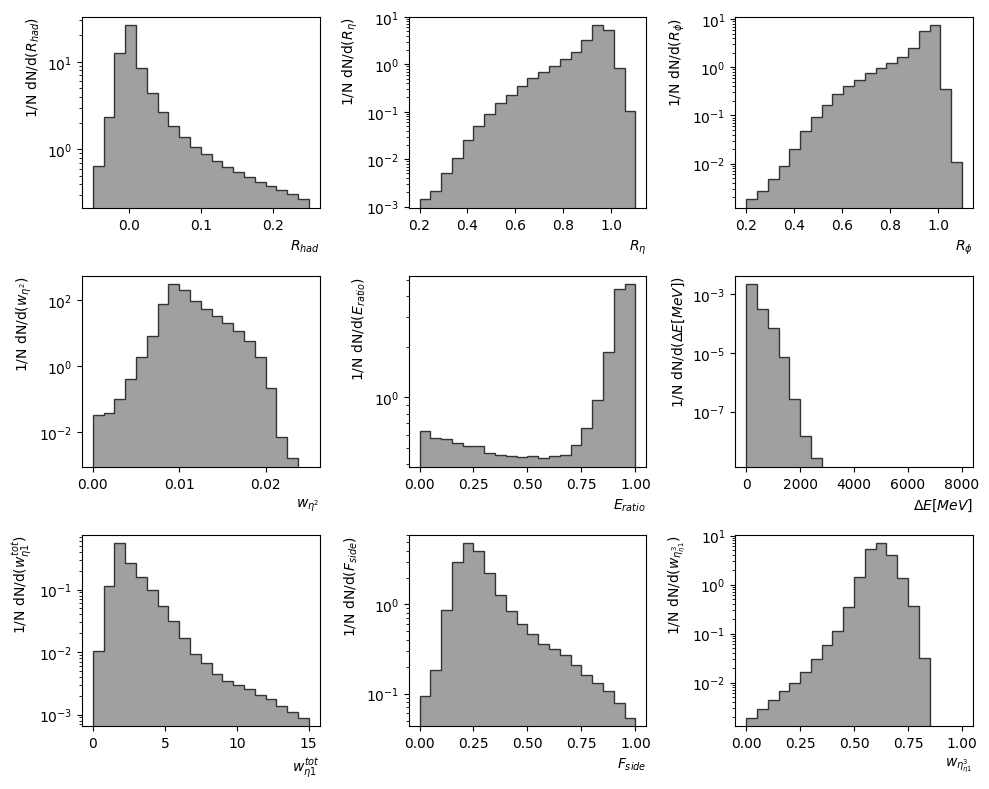

In [3]:
plot_feats(masked_data)

### Preselection of Converted Signal Photons

### get_labels
**get_labels(data)**

Checks if each event candidate is predetermined to be signal or backround.
#### Parameters:
* **data:** *numpy array*

  Data has features labeled 'ph.truth_pdgId' and 'ph.truth_type'.
  
  ```
  if d['ph.truth_pdgId'][i] == 22 and \
  d['ph.truth_type'][i]==15 or \
  d['ph.truth_type'][i]==13 or \
  d['ph.truth_type'][i]==14:
      labels.append(1)
  else:
      labels.append(0)
  labels = torch.Tensor(labels) ```

#### Returns:
* **labels:** *torch tensor*

  Shape : 1 $\times$ event candidates.

In [4]:
signal_labels = get_labels(masked_data)

KeyboardInterrupt: 

### true_sort
**true_sort(data,labels)**

Checks if each event candidate is predetermined to be signal or backround.
#### Parameters:
* **data:** *numpy array*
* **labels** *torch tensor*
  
  ```
  if labels[i] == 1:
      signal.append(data[i])
  else:
      backround.append(data[i])
  ```

#### Returns:
* **signal:** *numpy array*
  
  Shape : len(discriminating_vars) $\times$  signal event candidates.
* **background:** *numpy array*

  Shape : len(discriminating_vars) $\times$  background event candidates.

  

In [ ]:
signal, backround = true_sort(masked_data,signal_labels)

### Plotting True Vs Untrue Features for Conv

In [ ]:
plot_signal(signal,backround)

## Network Architecture

#### Input Tensor:
Let $X$ represent our input tensor that has shape $N\times F$:
$$ X \in \mathbb{R}^{N\times F} $$
Where $N$ is the number of event candidates and $F$ is the number of features.

#### Linear Transform:
The network computes this as:

$$ T = X \cdot W^{diag} + b $$

Where:
* $ W \in \mathbb{R}^F $ weight vector (one weight per feature)
* $ W^{diag} \in \mathbb{R}^{F\times F}$ weight matrix, diagnal matrix of $W$
$$ W^{diag} = \begin{pmatrix}
w_1 & 0 & 0 & \cdots & 0 \\
0 & w_2 & 0 & \cdots & 0 \\
0 & 0 & w_2 & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \cdots & w_F 
\end{pmatrix}$$
* $ b \in \mathbb{R}^F $

#### To be cont.



In [ ]:
import torch
import torch.nn
import torch.optim
import torch.utils.data

import time
import math

In [ ]:
split_ratio = 0.25
x_train_tensor, y_train_tensor, x_test_tensor, y_test_tensor = test_train_split(masked_data,split_ratio)

In [ ]:
import importlib
import sys
import LearningCutsUtils.EfficiencyScanNetwork
import LearningCutsUtils.LossFunctions
importlib.reload(LearningCutsUtils.EfficiencyScanNetwork)
importlib.reload(LearningCutsUtils.LossFunctions)
from LearningCutsUtils.EfficiencyScanNetwork import EfficiencyScanNetwork
from LearningCutsUtils.LossFunctions import effic_loss_fn, loss_fn

In [ ]:
N=len(signal_labels) # number of points
m=9 # dimensions


In [ ]:
gt=1.
lt=-1.
cuts_gt_lt = [lt, gt, gt, lt, gt, ### change these to correct cuts
              lt, lt, lt, lt] # l g g l g l l l l 

In [ ]:
targeteffics=[.2,.4,0.6,0.7,0.8,0.9]

# some hyperparameters
activation_input_scale_factor=27
learning_rate=0.5
batch_size=int(len(y_train_tensor)/1.) # only one batch
epochs=20
alpha=10.   # scaling factor to tune how important hitting the target signal efficiency is
beta=0.1     # scaling factor to tune how important background rejection is
gamma=1e-5  # scaling factor for how aggressively to push the cuts to zero
epsilon=1e-0   # how much to penalize deviations

In [ ]:

torch.manual_seed(123)

net = EfficiencyScanNetwork(m,targeteffics,cuts_gt_lt,activation_input_scale_factor) # will take m inputs, return m*n_eff outputs
torch.save(net.state_dict(), 'net_learningbiases_effictarget_untrained.pth')

optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)

In [ ]:
device="cpu"
if torch.cuda.is_available():
    torch.backends.cudnn.deterministic = True
    device="cuda:0"
print(device)

In [ ]:
losses = []
losses_test = []

net.load_state_dict(torch.load('net_learningbiases_effictarget_untrained.pth',weights_only=True))
xy_train = torch.utils.data.TensorDataset(x_train_tensor.float(),y_train_tensor)
loader = torch.utils.data.DataLoader(xy_train, batch_size=batch_size, shuffle=True)
debug=False

for epoch in range(epochs):
    net.train()
    start_time = time.time()
    for x_batch, y_batch in loader:
        y_pred = net(x_batch)
        optimizer.zero_grad()
        loss = effic_loss_fn(y_pred, y_batch, m, net, alpha, beta, gamma, epsilon,debug=debug)
        loss.totalloss().backward()
        optimizer.step()
    losses.append(loss)
    net.eval() # configure the model for evaluation (testing)
    y_pred = net(x_test_tensor)
    test_loss = effic_loss_fn(y_pred, y_test_tensor, m, net, alpha, beta, gamma, epsilon)
    losses_test.append(test_loss)
    end_time=time.time()
    elapsed_time = end_time - start_time
    print(f"Completed epoch {epoch:2d} in {elapsed_time:4.1f}s, Train loss={loss.totalloss().data:4.1e}, Test loss={test_loss.totalloss().data:4.1e}")

torch.save(net.state_dict(), 'net_learningbiases_effictarget_trained.pth')

In [ ]:
plotlosses(losses,losses_test)

In [ ]:
sig_effics=[]
bkg_effics=[]
loss_sig_effics=[]
loss_bkg_effics=[]

for n in range(len(targeteffics)):
    print(f"Target efficiency: {targeteffics[n]*100}%")
    check_effic(x_test_tensor,y_test_tensor.numpy(),net.nets[n],True)
    sig_effic,bkg_effic = check_effic(x_test_tensor,y_test_tensor.numpy(),net.nets[n],False)
    sig_effics.append(sig_effic)
    bkg_effics.append(bkg_effic)
    
    # check that after reloading the weights we still get the same performance after pretraining
    net.nets[n].eval() # configure the model for evaluation (testing)
    y_pred = net.nets[n](x_test_tensor)
    test_loss = loss_fn(y_pred, y_test_tensor, m, net.nets[n], targeteffics[n], alpha, beta, gamma, True)
    print("------------")
    loss_sig_effics.append(test_loss.signaleffic.detach().numpy())
    loss_bkg_effics.append(test_loss.backgreffic.detach().numpy())

# aisf changes effic

In [ ]:
import matplotlib.pyplot as plt

plt.plot(targeteffics,targeteffics   , '-', label="Target Efficiency")
plt.plot(targeteffics,sig_effics     , '.', label="Signal effic: cuts")
plt.plot(targeteffics,loss_sig_effics, '.', label="Signal effic: loss")
plt.plot(targeteffics,bkg_effics     , '.', label="Backgr effic: cuts")
plt.plot(targeteffics,loss_bkg_effics, '.', label="Backgr effic: loss")
plt.legend()
plt.xlabel('Target Signal Efficiency')
plt.ylabel('Efficiency')
plt.grid()
#plt.yscale('log');

In [ ]:
# Distributions of cuts
plotcuts(net)